In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install efficientnet-pytorch


  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=4624eb7edc73a20906aa2a9c1d58f0a254823fd03d5b20908e24e8ab68b9d965
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet-pytorch


In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from torchvision import *
from torch.utils.data import *
from PIL import Image
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt
import torchvision.transforms as T
from tqdm import tqdm

In [ ]:
from PIL import Image, UnidentifiedImageError
import os

source_dir = '/content/drive/MyDrive/Dataset'
class_folders = os.listdir(source_dir)

class_to_idx = {class_name: idx for idx, class_name in enumerate(class_folders)}

for class_name in class_folders:
    class_folder_path = os.path.join(source_dir, class_name)

    if os.path.isdir(class_folder_path):
        image_files = os.listdir(class_folder_path)

        for image_file in image_files:
            image_path = os.path.join(class_folder_path, image_file)

            if os.path.isfile(image_path):
                try:
                    with Image.open(image_path) as img:
                        img.verify()
                except (IOError, UnidentifiedImageError):
                    os.remove(image_path)
        remaining_files = os.listdir(class_folder_path)


In [ ]:
class_dirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

all_images = []
for class_dir in class_dirs:
    class_path = os.path.join(source_dir, class_dir)
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith('.jpg')]
    labels = [class_dirs.index(class_dir)] * len(images)
    all_images.extend(list(zip(images, labels)))

train_images, temp_images = train_test_split(all_images, test_size=0.2, random_state=42)
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Réduire la taille des images à 160x160 pour accélérer l'entraînement
    transforms.RandomHorizontalFlip(),  # Augmenter les données avec un retournement horizontal
    transforms.RandomRotation(10),  # Rotation aléatoire des images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalisation basée sur EfficientNet
])


class CustomDataset(Dataset):
    def __init__(self, image_list, transform=None):
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path, label = self.image_list[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = CustomDataset(train_images, transform)
val_dataset = CustomDataset(val_images, transform)
test_dataset = CustomDataset(test_images, transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Données prêtes pour l'entraînement, validation et test.")


Données prêtes pour l'entraînement, validation et test.


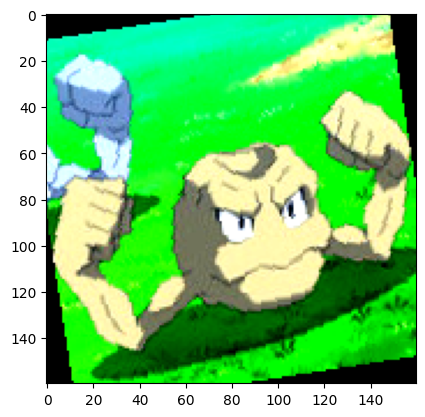

In [ ]:

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

data_iter = iter(train_loader)
images, labels = next(data_iter)
imshow(images[0])
print(f"Label: {labels[0]}")


In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b0')
model._fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(model._fc.in_features, num_classes)
)


Label: 103


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 148MB/s]


Loaded pretrained weights for efficientnet-b0


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

Epoch 1/10: 100%|██████████| 291/291 [26:11<00:00,  5.40s/batch, accuracy=57.8, loss=2.24]


Epoch 1/10, Train Loss: 2.2376, Accuracy: 57.83%
Epoch 1/10, Validation Loss: 0.4317, Accuracy: 88.55%


Epoch 2/10: 100%|██████████| 291/291 [25:40<00:00,  5.29s/batch, accuracy=92.4, loss=0.34]


Epoch 2/10, Train Loss: 0.3404, Accuracy: 92.38%
Epoch 2/10, Validation Loss: 0.2900, Accuracy: 92.08%


Epoch 3/10: 100%|██████████| 291/291 [25:52<00:00,  5.34s/batch, accuracy=96.3, loss=0.162]


Epoch 3/10, Train Loss: 0.1622, Accuracy: 96.29%
Epoch 3/10, Validation Loss: 0.2180, Accuracy: 94.58%


Epoch 4/10: 100%|██████████| 291/291 [25:52<00:00,  5.34s/batch, accuracy=97.3, loss=0.111]


Epoch 4/10, Train Loss: 0.1108, Accuracy: 97.31%
Epoch 4/10, Validation Loss: 0.2418, Accuracy: 93.89%


Epoch 5/10: 100%|██████████| 291/291 [26:15<00:00,  5.41s/batch, accuracy=97.8, loss=0.0908]


Epoch 5/10, Train Loss: 0.0908, Accuracy: 97.78%
Epoch 5/10, Validation Loss: 0.2461, Accuracy: 94.15%


Epoch 6/10: 100%|██████████| 291/291 [25:55<00:00,  5.35s/batch, accuracy=97.7, loss=0.0928]


Epoch 6/10, Train Loss: 0.0928, Accuracy: 97.67%
Epoch 6/10, Validation Loss: 0.2642, Accuracy: 94.23%


Epoch 7/10: 100%|██████████| 291/291 [25:45<00:00,  5.31s/batch, accuracy=98, loss=0.0763]


Epoch 7/10, Train Loss: 0.0763, Accuracy: 97.99%
Epoch 7/10, Validation Loss: 0.2256, Accuracy: 93.80%


Epoch 8/10: 100%|██████████| 291/291 [26:08<00:00,  5.39s/batch, accuracy=98.1, loss=0.0769]


Epoch 8/10, Train Loss: 0.0769, Accuracy: 98.09%
Epoch 8/10, Validation Loss: 0.2208, Accuracy: 94.84%


Epoch 9/10: 100%|██████████| 291/291 [26:10<00:00,  5.40s/batch, accuracy=98.5, loss=0.0591]


Epoch 9/10, Train Loss: 0.0591, Accuracy: 98.49%
Epoch 9/10, Validation Loss: 0.2088, Accuracy: 95.70%


Epoch 10/10: 100%|██████████| 291/291 [26:39<00:00,  5.50s/batch, accuracy=98.7, loss=0.0509]


Epoch 10/10, Train Loss: 0.0509, Accuracy: 98.69%
Epoch 10/10, Validation Loss: 0.2574, Accuracy: 94.75%


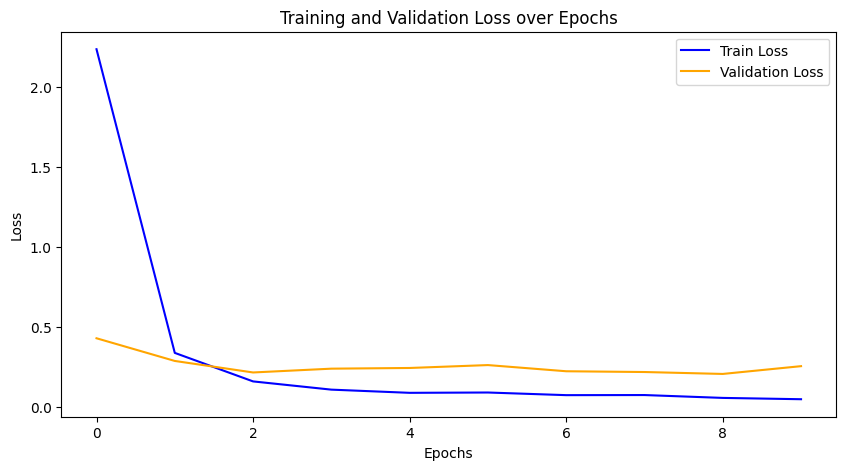

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

train_losses = []
val_losses = []

epochs = 10
for epoch in range(epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch") as pbar:
        for images, labels in pbar:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix(loss=running_loss/len(train_loader), accuracy=100 * correct/total)

    train_losses.append(running_loss / len(train_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
model.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader)

accuracy = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


Test Loss: 0.2375, Test Accuracy: 95.27%


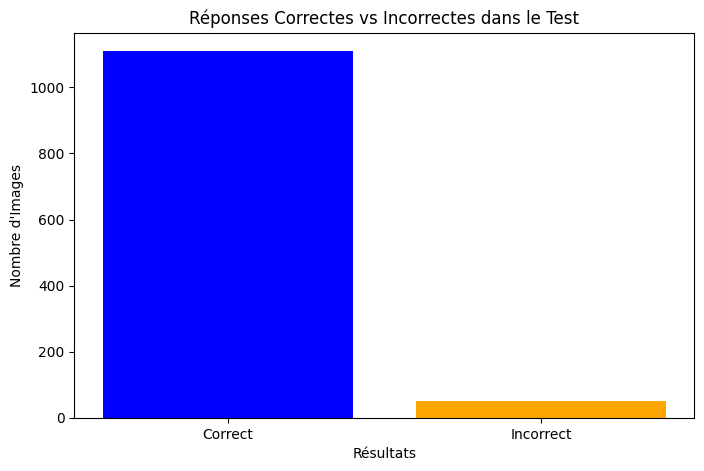

In [ ]:
import matplotlib.pyplot as plt

correct_count = 0
incorrect_count = 0

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        correct_count += (predicted == labels).sum().item()
        incorrect_count += (predicted != labels).sum().item()

categories = ['Correct', 'Incorrect']
values = [correct_count, incorrect_count]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange'])
plt.xlabel('Résultats')
plt.ylabel('Nombre d\'Images')
plt.title('Réponses Correctes vs Incorrectes dans le Test')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 30
images_per_row = 6
fig, axes = plt.subplots(nrows=num_images // images_per_row, ncols=images_per_row, figsize=(12, 12))

test_iter = iter(test_loader)

for i in range(num_images):
    ax = axes[i // images_per_row, i % images_per_row]

    images, labels = next(test_iter)
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    class_name = class_dirs[labels[0].item()]
    predicted_class_name = class_dirs[predicted[0].item()]

    ax.imshow(images[0].cpu().permute(1, 2, 0))
    ax.axis('off')


    ax.set_title(f'✔ {predicted_class_name}' if predicted[0] == labels[0] else f'✘ {predicted_class_name}', fontsize=12, color='green' if predicted[0] == labels[0] else 'red')

plt.tight_layout()
plt.show()


In [ ]:
print("hi")